## Data wrangling and feature engineering

In [1]:
import pandas as pd

In [2]:
income = pd.read_csv("./income.csv")
osm_all = pd.read_csv("./osm_features_all.csv")
osm_count = pd.read_csv("./osm_features_count.csv")
county_list = pd.read_csv("./Top10_in_counties_final_1212.csv")
tickets = pd.read_csv("./tickets.csv")
income.head()

,Unnamed: 0,Name,State_code,County,County_code,median_household_income,geometry
0,0,Great Smoky Mountains National Park,37,Swain,173,43750.0,POLYGON ((-9283353.236199999 4225557.685800001...
1,1,Great Smoky Mountains National Park,37,Swain,173,43137.0,POLYGON ((-9283353.236199999 4225557.685800001...
2,2,Great Smoky Mountains National Park,37,Swain,173,35150.0,POLYGON ((-9283353.236199999 4225557.685800001...
3,3,Great Smoky Mountains National Park,37,Swain,173,30023.0,POLYGON ((-9293925.916200001 4222930.102600001...
4,4,Great Smoky Mountains National Park,37,Swain,173,27955.0,POLYGON ((-9293925.916200001 4222930.102600001...


In [3]:
county_1 = county_list.merge(income[["County_code", "median_household_income", "geometry"]], on='County_code', how='left')
county_1

,ID,Name,Rank,State,State_code,County,County_code,median_household_income,geometry
0,1,Great Smoky Mountains National Park,1,North Carolina,37,Swain county,173,43750.0,POLYGON ((-9283353.236199999 4225557.685800001...
1,1,Great Smoky Mountains National Park,1,North Carolina,37,Swain county,173,43137.0,POLYGON ((-9283353.236199999 4225557.685800001...
2,1,Great Smoky Mountains National Park,1,North Carolina,37,Swain county,173,35150.0,POLYGON ((-9283353.236199999 4225557.685800001...
3,1,Great Smoky Mountains National Park,1,North Carolina,37,Swain county,173,30023.0,POLYGON ((-9293925.916200001 4222930.102600001...
4,1,Great Smoky Mountains National Park,1,North Carolina,37,Swain county,173,27955.0,POLYGON ((-9293925.916200001 4222930.102600001...
...,...,...,...,...,...,...,...,...,...
4499,22,Channel Islands National Park,10,California,6,Ventura county,111,100000.0,"POLYGON ((-13276729.5746 4060340.8182, -132765..."
4500,22,Channel Islands National Park,10,California,6,Ventura county,111,98370.0,"POLYGON ((-13276729.5746 4060340.8182, -132765..."
4501,22,Channel Islands National Park,10,California,6,Ventura county,111,53558.0,"POLYGON ((-13262582.2032 4066094.192900002, -1..."
4502,22,Channel Islands National Park,10,California,6,Ventura county,111,84524.0,"POLYGON ((-13221380.5219 4063238.285599999, -1..."


In [4]:
county_1["gap"] = ", "
county_1["State_county"] = county_1["County"].astype(str) + county_1["gap"] + county_1["State"]
county_1["bg_geometry"] = county_1["geometry"]
county_2 = county_1[["Name", "Rank", "State", "County", "median_household_income", "bg_geometry", "State_county"]]

In [5]:
county_3 = county_2.join(osm_all, how='left', lsuffix='State_county', rsuffix='county')
county_3

,Name,Rank,State,County,median_household_income,bg_geometry,State_county,Unnamed: 0,index,element_type,osmid,amenity,geometry,county
0,Great Smoky Mountains National Park,1,North Carolina,Swain county,43750.0,POLYGON ((-9283353.236199999 4225557.685800001...,"Swain county, North Carolina",0,0,node,173501710,parking,POINT (-83.3106587 35.5628631),"Swain county, North Carolina"
1,Great Smoky Mountains National Park,1,North Carolina,Swain county,43137.0,POLYGON ((-9283353.236199999 4225557.685800001...,"Swain county, North Carolina",1,1,node,173532098,parking,POINT (-83.4817975 35.5671889),"Swain county, North Carolina"
2,Great Smoky Mountains National Park,1,North Carolina,Swain county,35150.0,POLYGON ((-9283353.236199999 4225557.685800001...,"Swain county, North Carolina",2,2,node,173536808,parking,POINT (-83.17948 35.5718742),"Swain county, North Carolina"
3,Great Smoky Mountains National Park,1,North Carolina,Swain county,30023.0,POLYGON ((-9293925.916200001 4222930.102600001...,"Swain county, North Carolina",3,3,node,173539159,parking,POINT (-83.2114172 35.6241229),"Swain county, North Carolina"
4,Great Smoky Mountains National Park,1,North Carolina,Swain county,27955.0,POLYGON ((-9293925.916200001 4222930.102600001...,"Swain county, North Carolina",4,4,node,1264111556,restaurant,POINT (-83.429227 35.4329202),"Swain county, North Carolina"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,Channel Islands National Park,10,California,Ventura county,100000.0,"POLYGON ((-13276729.5746 4060340.8182, -132765...","Ventura county, California",4499,3127,way,861226616,parking,"POLYGON ((-110.9471747 32.2115206, -110.946968...","Pima county, Arizona"
4500,Channel Islands National Park,10,California,Ventura county,98370.0,"POLYGON ((-13276729.5746 4060340.8182, -132765...","Ventura county, California",4500,3128,way,861226619,parking,"POLYGON ((-110.946826 32.2120403, -110.9467254...","Pima county, Arizona"
4501,Channel Islands National Park,10,California,Ventura county,53558.0,"POLYGON ((-13262582.2032 4066094.192900002, -1...","Ventura county, California",4501,3129,way,861226621,parking,"POLYGON ((-110.9472284 32.212062, -110.9470004...","Pima county, Arizona"
4502,Channel Islands National Park,10,California,Ventura county,84524.0,"POLYGON ((-13221380.5219 4063238.285599999, -1...","Ventura county, California",4502,3130,way,861226625,parking,"POLYGON ((-110.9476292 32.2120568, -110.947403...","Pima county, Arizona"


In [6]:
income_average = income.groupby('Name').mean().reset_index()
income_average = income_average[["Name", "median_household_income"]]

In [7]:
parking = osm_count.loc[osm_count['amenity']=='parking'].reset_index()
parking["parking"] = parking["number"]
parking = parking[["county", "parking"]]

food = osm_count.loc[osm_count['amenity']=='restaurant'].reset_index()
food["restaurant"] = food["number"]
food = food[["county", "restaurant"]]

In [8]:
# county_list = pd.read_csv("./Top10_in_counties_final_1212.csv")
county_list["gap"] = ", "
county_list["State_county"] = county_list["County"].astype(str) + county_list["gap"] + county_list["State"]
county_list = county_list[["ID", "Name", "Rank", "State", "County", "State_county"]]
county_list.head()

,ID,Name,Rank,State,County,State_county
0,1,Great Smoky Mountains National Park,1,North Carolina,Swain county,"Swain county, North Carolina"
1,2,Great Smoky Mountains National Park,1,North Carolina,Haywood county,"Haywood county, North Carolina"
2,3,Great Smoky Mountains National Park,1,Tennessee,Sevier county,"Sevier county, Tennessee"
3,4,Great Smoky Mountains National Park,1,Tennessee,Blount county,"Blount county, Tennessee"
4,5,Great Smoky Mountains National Park,1,Tennessee,Cocke county,"Cocke county, Tennessee"


In [9]:
parking_park = parking.merge(county_list, left_on='county', right_on='State_county')
parking_park
park_osm = parking_park.merge(food, on='county')
park_osm = park_osm[["Name", "State", "County", "parking", "restaurant"]]
park_osm

,Name,State,County,parking,restaurant
0,Petrified Forest National Park,Arizona,Apache county,134,32
1,Great Smoky Mountains National Park,Tennessee,Blount county,296,72
2,Katmai National Park,Alaska,Bristol Bay,7,2
3,Great Smoky Mountains National Park,Tennessee,Cocke county,23,26
4,Grand Canyon National Park,Arizona,Coconino county,838,253
5,Everglades National Park,Florida,Collier county,1998,227
6,Great Smoky Mountains National Park,North Carolina,Haywood county,185,35
7,Redwood National Park,California,Humboldt county,802,161
8,Katmai National Park,Alaska,Kenai Peninsula,448,102
9,Crater Lake National Park,Oregon,Klamath county,237,55


In [10]:
park_osm = park_osm.groupby("Name").sum().reset_index()
park_osm

,Name,parking,restaurant
0,Channel Islands National Park,2468,938
1,Crater Lake National Park,237,55
2,Everglades National Park,6582,1808
3,Grand Canyon National Park,1102,341
4,Great Smoky Mountains National Park,1035,337
5,Katmai National Park,525,112
6,Mesa Verde National Park,114,31
7,Petrified Forest National Park,457,125
8,Redwood National Park,802,161
9,Saguaro National Park,13897,876


In [11]:
# income_average

In [12]:
# tickets

In [13]:
all_features_park = income_average.merge(park_osm, on='Name', how='left')
all_features_park = all_features_park.merge(tickets, left_on='Name', right_on='national parks')
all_features_park = all_features_park[["Name", "median_household_income", "parking", "restaurant", "tickets"]]
all_features_park

,Name,median_household_income,parking,restaurant,tickets
0,Channel Islands National Park,87130.596231,2468,938,No
1,Crater Lake National Park,45011.746269,237,55,Yes
2,Everglades National Park,61926.722491,6582,1808,Yes
3,Grand Canyon National Park,51069.023148,1102,341,Yes
4,Great Smoky Mountains National Park,47624.339713,1035,337,No
5,Katmai National Park,66896.333333,525,112,No
6,Mesa Verde National Park,49601.227273,114,31,Yes
7,Petrified Forest National Park,36470.413534,457,125,No
8,Redwood National Park,47756.425926,802,161,No
9,Saguaro National Park,53585.047619,13897,876,Yes


In [14]:
weather = pd.read_csv("./weather_data_2016_2020.csv")

In [15]:
weather

,Unnamed: 0,station,interval60,Temperature,Precipitation,Wind_Speed,Year
0,1,BNA,2020-12-12 00:00:00,57.9,0.0,10,2020
1,2,BNA,2020-12-12 01:00:00,59.0,0.0,10,2020
2,3,BNA,2020-12-12 02:00:00,59.0,0.0,11,2020
3,4,BNA,2020-12-12 03:00:00,59.0,0.0,10,2020
4,5,BNA,2020-12-12 04:00:00,59.0,0.0,13,2020
...,...,...,...,...,...,...,...
13666,13667,LAX,2016-12-24 19:00:00,55.9,0.0,19,2016
13667,13668,LAX,2016-12-24 20:00:00,57.0,0.0,25,2016
13668,13669,LAX,2016-12-24 21:00:00,57.0,0.0,23,2016
13669,13670,LAX,2016-12-24 22:00:00,57.0,0.0,24,2016


In [16]:
import datetime
from datetime import datetime

In [17]:
weather["interval60"] = pd.to_datetime(weather["interval60"])
weather["date"] = weather["interval60"].dt.date
weather

,Unnamed: 0,station,interval60,Temperature,Precipitation,Wind_Speed,Year,date
0,1,BNA,2020-12-12 00:00:00,57.9,0.0,10,2020,2020-12-12
1,2,BNA,2020-12-12 01:00:00,59.0,0.0,10,2020,2020-12-12
2,3,BNA,2020-12-12 02:00:00,59.0,0.0,11,2020,2020-12-12
3,4,BNA,2020-12-12 03:00:00,59.0,0.0,10,2020,2020-12-12
4,5,BNA,2020-12-12 04:00:00,59.0,0.0,13,2020,2020-12-12
...,...,...,...,...,...,...,...,...
13666,13667,LAX,2016-12-24 19:00:00,55.9,0.0,19,2016,2016-12-24
13667,13668,LAX,2016-12-24 20:00:00,57.0,0.0,25,2016,2016-12-24
13668,13669,LAX,2016-12-24 21:00:00,57.0,0.0,23,2016,2016-12-24
13669,13670,LAX,2016-12-24 22:00:00,57.0,0.0,24,2016,2016-12-24


In [18]:
weather_tem_max = weather[['station', 'date', 'Temperature']].groupby(["station", "date"]).max().reset_index()
weather_tem_max['max_temperature'] = weather_tem_max['Temperature']
weather_tem_max = weather_tem_max[["station", "date", "max_temperature"]]
weather_tem_min = weather[['station', 'date', 'Temperature']].groupby(["station", "date"]).min().reset_index()
weather_tem_min['min_temperature'] = weather_tem_min['Temperature']
weather_tem_min = weather_tem_min[["station", "date", "min_temperature"]]
weather_tem = weather_tem_max.merge(weather_tem_min)

In [19]:
weather_pre = weather[['station', 'date', 'Precipitation']].groupby(["station", "date"]).sum().reset_index()
weather_wind = weather[['station', 'date', 'Wind_Speed']].groupby(["station", "date"]).max().reset_index()
weather_all = weather_tem.merge(weather_pre.merge(weather_wind))

In [20]:
weather_all 

,station,date,max_temperature,min_temperature,Precipitation,Wind_Speed
0,BNA,2016-12-12,55.9,44.1,8.7016,26
1,BNA,2016-12-13,44.1,37.9,0.7207,11
2,BNA,2016-12-14,41.0,37.0,0.0000,11
3,BNA,2016-12-15,37.0,21.0,0.0000,14
4,BNA,2016-12-16,46.0,19.9,0.0000,15
...,...,...,...,...,...,...
572,TUS,2020-12-20,73.0,35.1,0.0000,9
573,TUS,2020-12-21,79.0,37.0,0.0000,13
574,TUS,2020-12-22,75.0,42.1,0.0000,11
575,TUS,2020-12-23,69.1,41.0,0.0000,14


In [21]:
weather_cluster = weather_all.groupby(["station"]).mean().reset_index()
weather_cluster

,station,max_temperature,min_temperature,Precipitation,Wind_Speed
0,BNA,53.006154,36.520000,1.399892,13.846154
1,LAX,67.403077,51.944615,0.454912,13.446154
2,MIA,79.581538,64.707692,0.820520,13.184615
3,MTJ,39.581538,17.749231,0.074040,12.738462
4,PARC,1.049123,-5.689474,0.006386,5.912281
5,PDX,47.461538,38.238462,1.020040,15.246154
6,PHX,67.800000,45.995385,0.128252,11.538462
7,SFO,58.192308,47.090769,0.527146,14.692308
8,TUS,68.067692,40.524615,0.090218,14.415385


In [22]:
airport = pd.read_csv("./airport_code.csv")
airport

,Name,Rank,State,Airport,Airport Code
0,Great Smoky Mountains National Park,1,"North Carolina, Tennessee",Nashville International Airport,BNA
1,Saguaro National Park,2,Arizona,Tucson International Airport,TUS
2,Petrified Forest National Park,3,Arizona,Phoenix Sky Harbor International Airport,PHX
3,Crater Lake National Park,4,Oregon,Portland International Airport,PDX
4,Redwood National Park,5,California,San Francisco International Airport,SFO
5,Katmai National Park,6,Alaska,Ted Stevens Anchorage International Airport,ANC
6,Mesa Verde National Park,7,Corolado,Montrose Regional Airport,MTJ
7,Everglades National Park,8,Florida,Miami International Airport,MIA
8,Grand Canyon National Park,9,Arizona,Phoenix Sky Harbor International Airport,PHX
9,Channel Islands National Park,10,California,Los Angeles International Airport,LAX


In [23]:
all_features_aircode = all_features_park.merge(airport[["Name", "Airport Code"]], left_on='Name', right_on='Name')
all_features_weather = all_features_aircode.merge(weather_cluster, left_on='Airport Code', right_on='station')
all_features_weather = all_features_weather[["Name", "median_household_income", "parking", 
                                             "restaurant", "tickets", "max_temperature",
                                             "min_temperature", "Precipitation", "Wind_Speed"]]
all_features_weather

,Name,median_household_income,parking,restaurant,tickets,max_temperature,min_temperature,Precipitation,Wind_Speed
0,Channel Islands National Park,87130.596231,2468,938,No,67.403077,51.944615,0.454912,13.446154
1,Crater Lake National Park,45011.746269,237,55,Yes,47.461538,38.238462,1.020040,15.246154
2,Everglades National Park,61926.722491,6582,1808,Yes,79.581538,64.707692,0.820520,13.184615
3,Grand Canyon National Park,51069.023148,1102,341,Yes,67.800000,45.995385,0.128252,11.538462
4,Petrified Forest National Park,36470.413534,457,125,No,67.800000,45.995385,0.128252,11.538462
5,Great Smoky Mountains National Park,47624.339713,1035,337,No,53.006154,36.520000,1.399892,13.846154
6,Mesa Verde National Park,49601.227273,114,31,Yes,39.581538,17.749231,0.074040,12.738462
7,Redwood National Park,47756.425926,802,161,No,58.192308,47.090769,0.527146,14.692308
8,Saguaro National Park,53585.047619,13897,876,Yes,68.067692,40.524615,0.090218,14.415385


In [24]:
population = pd.read_csv(".\income_population.csv")
population.head()

,Unnamed: 0,Name,State_code,County,County_code,median_household_income,total_population,geometry
0,0,Great Smoky Mountains National Park,37,Swain,173,43750.0,949.0,POLYGON ((-9283353.236199999 4225557.685800001...
1,1,Great Smoky Mountains National Park,37,Swain,173,43137.0,2703.0,POLYGON ((-9283353.236199999 4225557.685800001...
2,2,Great Smoky Mountains National Park,37,Swain,173,35150.0,1218.0,POLYGON ((-9283353.236199999 4225557.685800001...
3,3,Great Smoky Mountains National Park,37,Swain,173,30023.0,1357.0,POLYGON ((-9293925.916200001 4222930.102600001...
4,4,Great Smoky Mountains National Park,37,Swain,173,27955.0,759.0,POLYGON ((-9293925.916200001 4222930.102600001...


In [25]:
population_sum = population.groupby(["Name", "County"]).sum().reset_index()
population_sum = population_sum[["Name", "County", "total_population"]]
population_sum

,Name,County,total_population
0,Channel Islands National Park,Santa Barbara,444829.0
1,Channel Islands National Park,Ventura,847263.0
2,Crater Lake National Park,Klamath,66921.0
3,Everglades National Park,Collier,371453.0
4,Everglades National Park,Miami Dade,2699428.0
5,Everglades National Park,Monroe,75798.0
6,Grand Canyon National Park,Coconino,141274.0
7,Grand Canyon National Park,Mohave,207695.0
8,Great Smoky Mountains National Park,Blount,129927.0
9,Great Smoky Mountains National Park,Cocke,35552.0


In [26]:
crime = pd.read_csv(".\Crime_counties.csv")

In [27]:
crime_mean = crime.mean().reset_index(name ='mean_crime')
crime_mean = crime_mean.drop(0)
crime_mean["County"] = crime_mean["index"]
crime_mean = crime_mean[["County", "mean_crime"]]
crime_mean

,County,mean_crime
1,Swain,327.777778
2,Haywood,1334.300000
3,Sevier,2300.400000
4,Blount,2492.200000
5,Cocke,1019.900000
6,Pima,12028.800000
7,Navajo,710.200000
8,Apache,265.714286
9,Klamath,918.000000
10,Humboldt,1613.800000


In [28]:
crime_pop = crime_mean.merge(population_sum)
crime_pop["crime_pop1000"] = crime_pop["mean_crime"]/crime_pop["total_population"]*1000
crime_pop.head()

,County,mean_crime,Name,total_population,crime_pop1000
0,Swain,327.777778,Great Smoky Mountains National Park,14260.0,22.985819
1,Haywood,1334.300000,Great Smoky Mountains National Park,61053.0,21.854782
2,Sevier,2300.400000,Great Smoky Mountains National Park,97068.0,23.698850
3,Blount,2492.200000,Great Smoky Mountains National Park,129927.0,19.181540
4,Cocke,1019.900000,Great Smoky Mountains National Park,35552.0,28.687556


In [29]:
crime_park = crime_pop[["Name", "crime_pop1000"]].groupby("Name").mean().reset_index()
crime_park

,Name,crime_pop1000
0,Channel Islands National Park,3.951806
1,Crater Lake National Park,13.717667
2,Everglades National Park,21.051962
3,Grand Canyon National Park,9.702908
4,Great Smoky Mountains National Park,23.281710
5,Katmai National Park,29.830748
6,Mesa Verde National Park,9.258192
7,Petrified Forest National Park,5.107604
8,Redwood National Park,11.871414
9,Saguaro National Park,11.710201


In [30]:
all_features_crime = all_features_weather.merge(crime_park)
all_features_crime

,Name,median_household_income,parking,restaurant,tickets,max_temperature,min_temperature,Precipitation,Wind_Speed,crime_pop1000
0,Channel Islands National Park,87130.596231,2468,938,No,67.403077,51.944615,0.454912,13.446154,3.951806
1,Crater Lake National Park,45011.746269,237,55,Yes,47.461538,38.238462,1.020040,15.246154,13.717667
2,Everglades National Park,61926.722491,6582,1808,Yes,79.581538,64.707692,0.820520,13.184615,21.051962
3,Grand Canyon National Park,51069.023148,1102,341,Yes,67.800000,45.995385,0.128252,11.538462,9.702908
4,Petrified Forest National Park,36470.413534,457,125,No,67.800000,45.995385,0.128252,11.538462,5.107604
5,Great Smoky Mountains National Park,47624.339713,1035,337,No,53.006154,36.520000,1.399892,13.846154,23.281710
6,Mesa Verde National Park,49601.227273,114,31,Yes,39.581538,17.749231,0.074040,12.738462,9.258192
7,Redwood National Park,47756.425926,802,161,No,58.192308,47.090769,0.527146,14.692308,11.871414
8,Saguaro National Park,53585.047619,13897,876,Yes,68.067692,40.524615,0.090218,14.415385,11.710201


In [31]:
all_features_crime["tickets_label"]=all_features_crime["tickets"]
for i in range(0, len(all_features_crime)):
    if all_features_crime["tickets"][i]=='No':
        all_features_crime["tickets_label"][i]=0
    if all_features_crime["tickets"][i]=='Yes':
        all_features_crime["tickets_label"][i]=1
all_features_crime.head()

C:\Users\CSS\AppData\Local\Temp/ipykernel_25524/3214032763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_features_crime["tickets_label"][i]=0
C:\Users\CSS\AppData\Local\Temp/ipykernel_25524/3214032763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_features_crime["tickets_label"][i]=1


,Name,median_household_income,parking,restaurant,tickets,max_temperature,min_temperature,Precipitation,Wind_Speed,crime_pop1000,tickets_label
0,Channel Islands National Park,87130.596231,2468,938,No,67.403077,51.944615,0.454912,13.446154,3.951806,0
1,Crater Lake National Park,45011.746269,237,55,Yes,47.461538,38.238462,1.020040,15.246154,13.717667,1
2,Everglades National Park,61926.722491,6582,1808,Yes,79.581538,64.707692,0.820520,13.184615,21.051962,1
3,Grand Canyon National Park,51069.023148,1102,341,Yes,67.800000,45.995385,0.128252,11.538462,9.702908,1
4,Petrified Forest National Park,36470.413534,457,125,No,67.800000,45.995385,0.128252,11.538462,5.107604,0


## K-means Clustering

In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=3)

In [37]:
kmeans.fit(all_features_crime[["median_household_income", "parking", 
                                 "restaurant", "max_temperature", "tickets_label", 
                                 "min_temperature", "Precipitation", "Wind_Speed"]])

KMeans(n_clusters=3)

In [38]:
all_features_crime['label'] = kmeans.labels_
all_features_crime

,Name,median_household_income,parking,restaurant,tickets,max_temperature,min_temperature,Precipitation,Wind_Speed,crime_pop1000,tickets_label,label
0,Channel Islands National Park,87130.596231,2468,938,No,67.403077,51.944615,0.454912,13.446154,3.951806,0,2
1,Crater Lake National Park,45011.746269,237,55,Yes,47.461538,38.238462,1.020040,15.246154,13.717667,1,1
2,Everglades National Park,61926.722491,6582,1808,Yes,79.581538,64.707692,0.820520,13.184615,21.051962,1,0
3,Grand Canyon National Park,51069.023148,1102,341,Yes,67.800000,45.995385,0.128252,11.538462,9.702908,1,1
4,Petrified Forest National Park,36470.413534,457,125,No,67.800000,45.995385,0.128252,11.538462,5.107604,0,1
5,Great Smoky Mountains National Park,47624.339713,1035,337,No,53.006154,36.520000,1.399892,13.846154,23.281710,0,1
6,Mesa Verde National Park,49601.227273,114,31,Yes,39.581538,17.749231,0.074040,12.738462,9.258192,1,1
7,Redwood National Park,47756.425926,802,161,No,58.192308,47.090769,0.527146,14.692308,11.871414,0,1
8,Saguaro National Park,53585.047619,13897,876,Yes,68.067692,40.524615,0.090218,14.415385,11.710201,1,0


## Try Hierarchical Clustering

In [35]:
from matplotlib import pyplot as plt

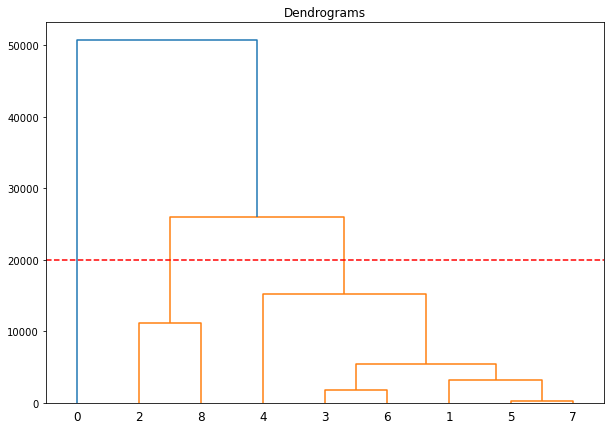

In [39]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(all_features_crime[["median_household_income", "parking", 
                                 "restaurant", "max_temperature", "tickets_label", 
                                 "min_temperature", "Precipitation", "Wind_Speed"]], 
                                  method='ward'))
plt.axhline(y=20000, color='r', linestyle='--')

In [40]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(all_features_crime[["median_household_income", "parking", 
                                 "restaurant", "max_temperature", "tickets_label", 
                                 "min_temperature", "Precipitation", "Wind_Speed"]])

array([1, 0, 2, 0, 0, 0, 0, 0, 2], dtype=int64)

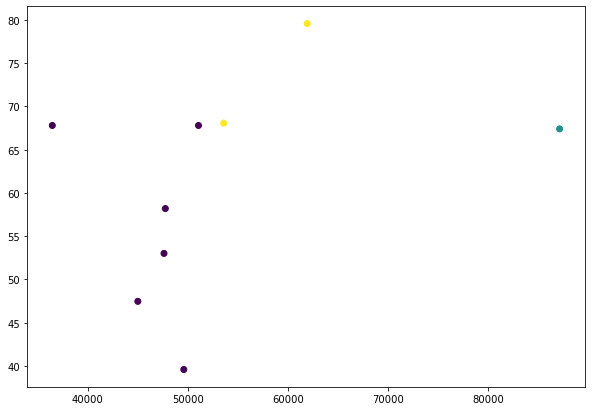

In [41]:
plt.figure(figsize=(10, 7))  
plt.scatter(all_features_crime['median_household_income'], all_features_crime['max_temperature'], c=cluster.labels_) 